# Исследовательский анализ данных сервиса бронирования билетов Яндекс.Афиша в Python и проверка гипотез.

- Выполнил: Ложникова Елена
- Дата: 05.06.2025


**Цель проекта** — провести исследовательский анализ данных сервиса бронирования билетов Яндекс.Афиша за период с 1 июня по 30 октября 2024 года, чтобы выяснить причины изменений в пользовательском спросе, определить ключевые факторы, влияющие на популярность мероприятий, и проанализировать активность пользователей, как с мобильных, так и с десктопных устройств. В результате анализа будет произведено сравнение сезонных изменений, выделение лидеров по выручке, а также определение особенностей поведения пользователей в зависимости от различных факторов, таких как тип мероприятия, устройство, возрастное ограничение и прочее.

**Задачи проекта**  

1. **Загрузить и подготовить данные.**  
   Анализ и подготовка данных для дальнейшего исследования, включая проверку на пропуски, дубликаты, преобразование валют и создание новых столбцов, таких как выручка в рублях, выручка с одного билета и информация о сезонности.  

2. **Провести исследовательский анализ данных.**  
   Изучение распределения заказов по различным сегментам (тип мероприятия, тип устройства, категории по возрастному рейтингу) и анализ их сезонных изменений. Включает расчет средней выручки с одного билета, а также сравнение активности пользователей.  

3. **Проанализировать активность пользователей в 2024 году.**  
   Анализ динамики заказов, количества активных пользователей (DAU), средней активности пользователей и выявление недельной цикличности.  

4. **Исследовать популярность событий и партнеров в 2024 году.**  
   Определение наиболее популярных мероприятий, анализ выручки по регионам и партнерам, а также выявление лидеров по количеству мероприятий и заказов.  

5. **Проверить гипотезы.**  
   Статистический анализ для проверки гипотез о более высокой активности пользователей мобильных приложений по сравнению с десктопными, включая использование соответствующих статистических тестов.  

6. **Сформулировать общий вывод и рекомендации.**  
   Описание основных результатов исследования, анализ трендов, выявление лидеров среди регионов и партнеров, а также предложения по улучшению пользовательского опыта и дальнейшему развитию сервиса.  

### Описание данных ###

Для анализа представлены три датасета: `final_tickets_orders_df.csv`,  `final_tickets_events_df.csv`, `final_tickets_tenge_df.csv`.

     
Таблица `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.

- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev` - количество дней с предыдущей покупки для каждого пользователя

Таблица `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

Таблица `final_tickets_tenge_df.csv` включает информацию о курсе тенге к российскому рублю за 2024 год.

- `nominal` — номинал (100 тенге);
- `data` — дата;
- `curs` — курс тенге к рублю;
- `cdx` — обозначение валюты (kzt).


### Структура проекта ###
1. Загрузка данных.
2. Предобработка данных.
 - 2.1  Проверка пропусков.
 - 2.2  Анализ значений в ключевых столбцах.
 - 2.3  Проверка дубликатов.
 - 2.4  Преобразование типов данных.
 - 2.5  Создание новых столбцов.
3. Исследовательский анализ данных.
 - 3.1  Анализ распределения заказов по сегментам и их сезонные изменения.
 - 3.2  Анализ осенней активности пользователей.
 - 3.3  Анализ популярных событий и партнеров.
4. Проверка гиротез.   
5. Итоговые выводы.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Загрузка данных ##

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
pd.__version__

'1.2.4'

In [6]:
df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
df_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
df_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

### Знакомство с данными ###

In [7]:
display(df_orders.head(5))
display(df_events.head(5))
display(df_tenge.head(5))

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [8]:
display(df_orders.dtypes)
display(df_events.dtypes)
display(df_tenge.dtypes)

order_id                   int64
user_id                   object
created_dt_msk            object
created_ts_msk            object
event_id                   int64
cinema_circuit            object
age_limit                  int64
currency_code             object
device_type_canonical     object
revenue                  float64
service_name              object
tickets_count              int64
total                    float64
days_since_prev          float64
dtype: object

event_id                   int64
event_name                object
event_type_description    object
event_type_main           object
organizers                object
region_name               object
city_name                 object
city_id                    int64
venue_id                   int64
venue_name                object
venue_address             object
dtype: object

data        object
nominal      int64
curs       float64
cdx         object
dtype: object

In [9]:
display(df_orders.shape)
display(df_events.shape)
display(df_tenge.shape)

(290849, 14)

(22427, 11)

(357, 4)

`df_orders`:

- eсть пропуски NaN в `days_since_prev`, если покупки не было (оставим без изменений, чтобы избежать искажения данных) 
- `created_dt_msk` и `created_ts_msk` хранятся как object (нужно преобразовать в datetime).
- `total` и `revenue` — числовые, но требуют проверки на аномалии (например, отрицательные значения).

`df_events`:

- все столбцы заполнены, типы данных корректны.

`df_tenge`:

- `data` хранится как object (нужно преобразовать в datetime).


## Предобработка данных и подготовка их к исследованию

### Проверка пропусков

Проверьте, что выгрузка данных из SQL была успешной. Кроме столбца days_since_prev, данные не должны содержать пропусков.

In [10]:
# Проверим, все ли event_id из df_orders есть в df_events
missing_events = df_orders[~df_orders['event_id'].isin(df_events['event_id'])]
print(f"Количество заказов с неизвестными event_id: {len(missing_events)}")

Количество заказов с неизвестными event_id: 238


In [11]:
# Объединим датафреймы в один df 
df_merged = pd.merge(df_orders,
                     df_events,
                     on='event_id',
                     how='left')  # left join, чтобы сохранить все заказы, даже если event_id нет в df_events

In [12]:
# Проверим результат объединения
print(f"Размер df_orders: {df_orders.shape}")
print(f"Размер df_merged: {df_merged.shape}")

missing_values = df_merged.isna().sum()
missing_percent = (missing_values / len(df_merged)) * 100

print("\nПропуски после объединения:")
display(pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent.round(2)}))

Размер df_orders: (290849, 14)
Размер df_merged: (290849, 24)

Пропуски после объединения:


,Количество пропусков,Процент пропусков
order_id,0,0.00
user_id,0,0.00
created_dt_msk,0,0.00
created_ts_msk,0,0.00
event_id,0,0.00
cinema_circuit,0,0.00
age_limit,0,0.00
currency_code,0,0.00
device_type_canonical,0,0.00
revenue,0,0.00


In [13]:
# Заменим пропуски на unknown в столбцах, для которых event_id не найдены в объединенном df 
event_cols = ['event_name', 'event_type_description', 'event_type_main', 'organizers', 'region_name','city_name', 'venue_name', 
              'venue_address']
df_merged[event_cols] = df_merged[event_cols].fillna("unknown")

In [14]:
# В столбцах с индентификаторами 'city_id', 'venue_id' заменим пропуски на "заглушку": -1
df_merged['city_id'] = df_merged['city_id'].fillna(-1).astype(int)
df_merged['venue_id'] = df_merged['venue_id'].fillna(-1).astype(int)

In [15]:
df_merged.dtypes

order_id                    int64
user_id                    object
created_dt_msk             object
created_ts_msk             object
event_id                    int64
cinema_circuit             object
age_limit                   int64
currency_code              object
device_type_canonical      object
revenue                   float64
service_name               object
tickets_count               int64
total                     float64
days_since_prev           float64
event_name                 object
event_type_description     object
event_type_main            object
organizers                 object
region_name                object
city_name                  object
city_id                     int64
venue_id                    int64
venue_name                 object
venue_address              object
dtype: object

In [16]:
# Проверим пропуски после замены
na_merged = pd.DataFrame({'Количество пропусков': df_merged.isna().sum(),
                           'Доля пропусков (%)': (df_merged.isna().mean() * 100).round(2)})
display(na_merged)

,Количество пропусков,Доля пропусков (%)
order_id,0,0.00
user_id,0,0.00
created_dt_msk,0,0.00
created_ts_msk,0,0.00
event_id,0,0.00
cinema_circuit,0,0.00
age_limit,0,0.00
currency_code,0,0.00
device_type_canonical,0,0.00
revenue,0,0.00


### Анализ значений в ключевых столбцах ###

Для категориальных значений изучите, какие категории присутствуют в данных. Проверьте, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Проведите нормализацию данных, если это необходимо.

In [17]:
# Проверим данные в категориальных столбцах
cat_cols = ['cinema_circuit', 'currency_code', 'device_type_canonical', 
            'service_name', 'event_type_main', 'region_name', 'city_name']

for col in cat_cols:
    print(f"Уникальные значения в {col}:")
    display(df_merged[col].value_counts(dropna=False).head(10))

Уникальные значения в cinema_circuit:


нет           289451
Другое          1261
КиноСити         122
Киномакс           7
Москино            7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

Уникальные значения в currency_code:


rub    285780
kzt      5069
Name: currency_code, dtype: int64

Уникальные значения в device_type_canonical:


mobile     232679
desktop     58170
Name: device_type_canonical, dtype: int64

Уникальные значения в service_name:


Билеты без проблем    63709
Лови билет!           41126
Билеты в руки         40364
Мой билет             34843
Облачко               26642
Лучшие билеты         17795
Весь в билетах        16849
Прачечная             10273
Край билетов           6207
Тебе билет!            5228
Name: service_name, dtype: int64

Уникальные значения в event_type_main:


концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
unknown        238
Name: event_type_main, dtype: int64

Уникальные значения в region_name:


Каменевский регион         91058
Североярская область       44049
Широковская область        16457
Медовская область          13901
Озернинский край           10476
Светополянский округ        7607
Малиновоярский округ        6618
Речиновская область         6293
Солнечноземская область     6288
Яблоневская область         6181
Name: region_name, dtype: int64

Уникальные значения в city_name:


Глиногорск      89446
Озёрск          43910
Радужсвет       13711
Радужнополье     8741
Верховино        6579
Дальнесветск     6293
Глинополье       6196
Светополье       5993
Глиноград        5934
Лесоярич         5831
Name: city_name, dtype: int64

- В столбце `cinema_circuit` 289451 строк содержат заглушку "нет", обозначающие пропуски в данных или отсутствие информации.
- В столбцах `cinema_circuit`, `service_name`, `region_name`, `city_name` необходимо привести значения к единому нижнему регистру.

In [18]:
# Приведем категориальные данные к нижнему регистру
cols_to_lower = ['cinema_circuit', 'service_name', 'region_name', 'city_name']

for col in cols_to_lower:
    df_merged[col] = df_merged[col].str.lower()

Для количественных значений посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге.

In [19]:
# Проверим данные в числовых столбцах
num_cols = ['revenue', 'tickets_count', 'total', 'age_limit']

for col in num_cols:
    print(f"\nСтатистика для {col}:")
    display(df_merged[col].describe())


Статистика для revenue:


count    290849.000000
mean        625.083054
std        1227.316214
min         -90.760000
25%         116.790000
50%         355.340000
75%         809.750000
max       81174.540000
Name: revenue, dtype: float64


Статистика для tickets_count:


count    290849.000000
mean          2.754230
std           1.170467
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


Статистика для total:


count    290849.000000
mean       7526.465613
std       15328.267730
min        -358.850000
25%        2156.870000
50%        4771.390000
75%        8955.950000
max      811745.400000
Name: total, dtype: float64


Статистика для age_limit:


count    290849.000000
mean         10.211278
std           6.518124
min           0.000000
25%           6.000000
50%          12.000000
75%          16.000000
max          18.000000
Name: age_limit, dtype: float64

- Отрицательные значения в столбцах `revenue` и `total`. Это подтверждает наличие возвратов/отмен бронирований.

In [20]:
# Посмотрим статистику выручки в разрезе валют
df_merged.groupby('currency_code')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
currency_code,,,,,,,,
kzt,5069.0,4995.206767,4916.752776,0.00,518.1000,3698.83,7397.66,26425.86
rub,285780.0,547.568333,871.524559,-90.76,113.8275,346.10,791.70,81174.54


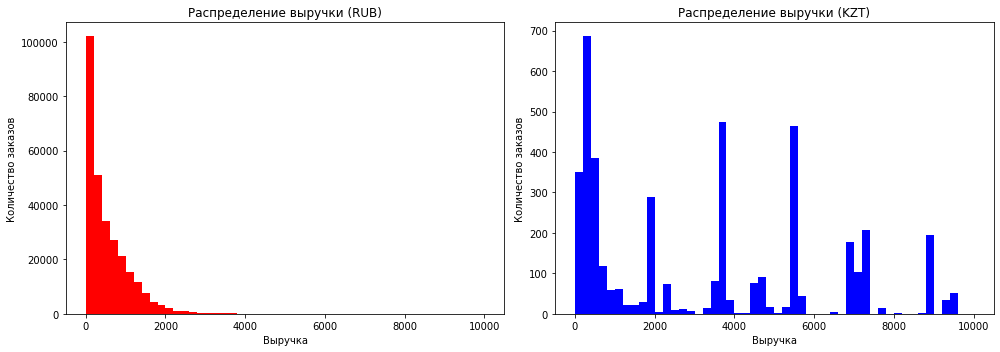

In [21]:
# Построим гистограммы распределения 'revenue' в разрезе валют
# Фильтруем данные по валютам
rub_data = df_merged[df_merged['currency_code'] == 'rub']['revenue']
kzt_data = df_merged[df_merged['currency_code'] == 'kzt']['revenue'] 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма для RUB
ax1.hist(rub_data, bins=50, range=(0, 10000), color='red')
ax1.set_title('Распределение выручки (RUB)')
ax1.set_xlabel('Выручка')
ax1.set_ylabel('Количество заказов')

# Гистограмма для KZT
ax2.hist(kzt_data, bins=50, range=(0, 10000), color='blue')
ax2.set_title('Распределение выручки (KZT)')
ax2.set_xlabel('Выручка')
ax2.set_ylabel('Количество заказов')

plt.tight_layout() 
plt.show()

В столбце 'revenue' выявлено:

rub:

- Сильная правосторонняя асимметрия: Среднее (547) > медианы (346) — есть редкие, но очень крупные заказы (максимум 81,174 RUB!), которые сильно искажают распределение.
- Отрицательное минимальное значение (-90.76 RUB): Возможны возвраты или ошибки в данных.
- 75% заказов ≤ 791 RUB, но максимальные значения в десятки тысяч — это "длинный хвост" распределения.
- Дальнейший анализ лучше проводить на усечённых данных, отфитльтровав выбросы (по 99-му перцентилю)

kzt: 

- Правосторонняя асимметрия: Среднее (4,995) > медианы (3,699), значит, есть редкие, но крупные заказы, которые "тянут" среднее вверх.
- Широкий разброс: Стандартное отклонение близко к среднему, что указывает на значительную вариативность данных.
- 25% заказов ≤ 518 KZT, а 75% заказов ≤ 7,397 KZT — большинство заказов сосредоточено в нижней части диапазона. Более крупные типичные заказы.
- Распределение ближе к "нормальному", но тоже с асимметрией.

In [22]:
# Расчитаем 99-й перцентиль для выручки для рублевых заказов 
percentiles_rub = (df_merged[df_merged['currency_code'] == 'rub']['revenue']
                  .quantile(0.99).round(2)) 
display(percentiles_rub)

2569.59

In [23]:
# Отберем данные по 99-му перцентилю для рублевых заказов
df_filtered = df_merged[((df_merged['currency_code'] == 'rub') &  
                        (df_merged['revenue'] <= percentiles_rub)) | (df_merged['currency_code'] == 'kzt')]

### Проверка дубликатов

Проверьте явные и неявные дубликаты. Сделайте акцент на неявных дубликатах по бронированию билета без учёта идентификаторов заказа и, если такие будут, примите обоснованное решение, как их стоит обработать.

In [24]:
# Проверим явные дубликаты
exacts_duplicates = df_filtered[df_filtered.duplicated()]
print(f"Полных дубликатов: {len(exacts_duplicates)}")

Полных дубликатов: 0


In [25]:
# Проверим неявные дубликаты по всем столбцам кроме `order_id`
potential_duplicates = df_filtered.groupby(['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address']).size().reset_index(name='duplicate_count')
suspicious = potential_duplicates[potential_duplicates['duplicate_count'] > 1]
print(f"Потенциальных неявных дубликатов: {len(suspicious)}")

Потенциальных неявных дубликатов: 28


In [26]:
duplicate_stats = potential_duplicates['duplicate_count'].value_counts().sort_index()
duplicate_stats

1    266193
2        26
3         2
Name: duplicate_count, dtype: int64

In [27]:
# Детально проверим найденные неявные дубликаты
cols = ['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address']

for params, group in df_filtered.groupby(cols):
    if len(group) > 1:
        print(f"\nНайдены дубликаты для параметров:\n{params}")
        display(group.drop_duplicates())


Найдены дубликаты для параметров:
('06eb7897f65b433', '2024-08-13', '2024-08-13 16:31:07', 183706, 'нет', 18, 'rub', 'mobile', 69.82, 'билеты в руки', 1, 997.48, 0.0, '69796237-909b-42a7-bfb5-c1b8574c4c76', 'спектакль', 'театр', '№1482', 'светополянский округ', 'глиноград', 54, 4443, 'Центр культурного наследия "Объединение" и партнеры', 'бул. Карбышева, д. 50')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
11777,1123983,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,...,69796237-909b-42a7-bfb5-c1b8574c4c76,спектакль,театр,№1482,светополянский округ,глиноград,54,4443,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50"
11778,1123867,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,...,69796237-909b-42a7-bfb5-c1b8574c4c76,спектакль,театр,№1482,светополянский округ,глиноград,54,4443,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50"



Найдены дубликаты для параметров:
('2564e3703075008', '2024-10-30', '2024-10-30 10:04:15', 589005, 'нет', 6, 'rub', 'mobile', 11.23, 'лови билет!', 2, 280.81, 0.0, 'bee8d0cc-282b-492e-9ed8-ec0990f43ffd', 'выставка', 'другое', '№1810', 'яблоневская область', 'горяново', 11036, 1656, 'Модная академия "Пункт" Лимитед', 'бул. Гагарина, д. 39')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
57217,160922,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,...,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,выставка,другое,№1810,яблоневская область,горяново,11036,1656,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39"
57220,160893,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,...,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,выставка,другое,№1810,яблоневская область,горяново,11036,1656,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39"



Найдены дубликаты для параметров:
('3ee7dc2e115847f', '2024-06-25', '2024-06-25 07:32:08', 277504, 'нет', 6, 'rub', 'mobile', 59.19, 'билеты в руки', 3, 739.85, 0.0, 'dcb6fe75-8502-480d-b8a2-6bee187cb7ee', 'событие', 'выставки', '№5015', 'нежинская область', 'каменёвка', 76, 3094, 'Сообщество художников "Палитра" и партнеры', 'пр. Театральный, д. 161 стр. 2')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
84010,3363711,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,...,dcb6fe75-8502-480d-b8a2-6bee187cb7ee,событие,выставки,№5015,нежинская область,каменёвка,76,3094,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2"
84015,3363798,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,...,dcb6fe75-8502-480d-b8a2-6bee187cb7ee,событие,выставки,№5015,нежинская область,каменёвка,76,3094,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2"



Найдены дубликаты для параметров:
('7b525118ae656af', '2024-10-28', '2024-10-28 08:33:04', 588203, 'нет', 0, 'rub', 'mobile', 26.96, 'лучшие билеты', 4, 674.12, 0.0, '88478781-0311-42e3-b0ea-d4d6a171b70a', 'спорт', 'спорт', '№1503', 'чистогорская область', 'песчанская', 21, 2155, 'Клуб моделей "Гармония" Инк', 'ул. Прохладная, д. 8 к. 432')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
148473,2324032,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,...,88478781-0311-42e3-b0ea-d4d6a171b70a,спорт,спорт,№1503,чистогорская область,песчанская,21,2155,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432"
148477,2323916,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,...,88478781-0311-42e3-b0ea-d4d6a171b70a,спорт,спорт,№1503,чистогорская область,песчанская,21,2155,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432"



Найдены дубликаты для параметров:
('7eb4fc207ecc10f', '2024-08-23', '2024-08-23 14:08:19', 298035, 'нет', 6, 'rub', 'mobile', 126.84, 'билеты без проблем', 1, 3170.95, 0.0, '09164a56-0fb3-43c7-91d3-8ed22bb3d8ef', 'событие', 'другое', '№4403', 'североярская область', 'озёрск', 2, 2795, 'Клуб исторических реконструкций "Логос" и партнеры', 'пр. Пушкина, д. 8/6 к. 482')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
154170,5372628,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,североярская область,озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
154173,5372831,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,североярская область,озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
154178,5373179,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,североярская область,озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"



Найдены дубликаты для параметров:
('7eb4fc207ecc10f', '2024-09-21', '2024-09-21 11:43:58', 448579, 'нет', 0, 'rub', 'mobile', 2.54, 'лови билет!', 1, 84.82, 0.0, 'a751c430-d352-44d7-99a0-29e97193eba5', 'спорт', 'спорт', '№1622', 'североярская область', 'озёрск', 2, 4607, 'Команда артистов "Светлячок" Лимитед', 'пер. Невского, д. 72')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
154981,3463732,7eb4fc207ecc10f,2024-09-21,2024-09-21 11:43:58,448579,нет,0,rub,mobile,2.54,...,a751c430-d352-44d7-99a0-29e97193eba5,спорт,спорт,№1622,североярская область,озёрск,2,4607,"Команда артистов ""Светлячок"" Лимитед","пер. Невского, д. 72"
154993,3463819,7eb4fc207ecc10f,2024-09-21,2024-09-21 11:43:58,448579,нет,0,rub,mobile,2.54,...,a751c430-d352-44d7-99a0-29e97193eba5,спорт,спорт,№1622,североярская область,озёрск,2,4607,"Команда артистов ""Светлячок"" Лимитед","пер. Невского, д. 72"



Найдены дубликаты для параметров:
('7eb4fc207ecc10f', '2024-10-26', '2024-10-26 09:39:03', 418836, 'нет', 0, 'rub', 'mobile', 294.85, 'лови билет!', 3, 4914.21, 0.0, 'a4478837-4631-4e28-95d7-a4c26751a232', 'цирковое шоу', 'другое', '№1703', 'тепляковская область', 'горнодолинск', 43, 4481, 'Школа сценического мастерства "Вдох" Лтд', 'пер. Полярный, д. 87')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
156213,6657937,7eb4fc207ecc10f,2024-10-26,2024-10-26 09:39:03,418836,нет,0,rub,mobile,294.85,...,a4478837-4631-4e28-95d7-a4c26751a232,цирковое шоу,другое,№1703,тепляковская область,горнодолинск,43,4481,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87"
156215,6657995,7eb4fc207ecc10f,2024-10-26,2024-10-26 09:39:03,418836,нет,0,rub,mobile,294.85,...,a4478837-4631-4e28-95d7-a4c26751a232,цирковое шоу,другое,№1703,тепляковская область,горнодолинск,43,4481,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87"



Найдены дубликаты для параметров:
('8d6c1ff89fac35f', '2024-10-31', '2024-10-31 22:28:57', 589624, 'нет', 16, 'rub', 'desktop', 41.83, 'мой билет', 1, 1045.75, 0.0, 'c9eb1fa4-257b-4290-975a-7fe34b46d11b', 'концерт', 'концерты', '№2121', 'каменевский регион', 'глиногорск', 213, 1365, 'Картинная галерея "Светлячок" Лтд', 'ул. Дальневосточная, д. 97 к. 1/4')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
174481,312621,8d6c1ff89fac35f,2024-10-31,2024-10-31 22:28:57,589624,нет,16,rub,desktop,41.83,...,c9eb1fa4-257b-4290-975a-7fe34b46d11b,концерт,концерты,№2121,каменевский регион,глиногорск,213,1365,"Картинная галерея ""Светлячок"" Лтд","ул. Дальневосточная, д. 97 к. 1/4"
174584,6114564,8d6c1ff89fac35f,2024-10-31,2024-10-31 22:28:57,589624,нет,16,rub,desktop,41.83,...,c9eb1fa4-257b-4290-975a-7fe34b46d11b,концерт,концерты,№2121,каменевский регион,глиногорск,213,1365,"Картинная галерея ""Светлячок"" Лтд","ул. Дальневосточная, д. 97 к. 1/4"



Найдены дубликаты для параметров:
('8f95286aa5fd8d7', '2024-06-20', '2024-06-20 10:57:19', 244875, 'нет', 0, 'rub', 'mobile', 15.73, 'лови билет!', 3, 524.39, 0.0, '61f8b9bd-a66f-4cd9-ae10-a0e62e923476', 'выставка', 'другое', '№3906', 'каменноозёрный край', 'ордакент', 12, 2492, 'Кинофестиваль "Хранитель" Инкорпорэйтед', 'пр. Балтийский, д. 8 к. 51')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
176438,8248268,8f95286aa5fd8d7,2024-06-20,2024-06-20 10:57:19,244875,нет,0,rub,mobile,15.73,...,61f8b9bd-a66f-4cd9-ae10-a0e62e923476,выставка,другое,№3906,каменноозёрный край,ордакент,12,2492,"Кинофестиваль ""Хранитель"" Инкорпорэйтед","пр. Балтийский, д. 8 к. 51"
176439,8248210,8f95286aa5fd8d7,2024-06-20,2024-06-20 10:57:19,244875,нет,0,rub,mobile,15.73,...,61f8b9bd-a66f-4cd9-ae10-a0e62e923476,выставка,другое,№3906,каменноозёрный край,ордакент,12,2492,"Кинофестиваль ""Хранитель"" Инкорпорэйтед","пр. Балтийский, д. 8 к. 51"



Найдены дубликаты для параметров:
('9103be7b790235f', '2024-08-03', '2024-08-03 15:01:56', 410465, 'нет', 0, 'rub', 'mobile', 685.12, 'мой билет', 2, 5709.34, 0.0, 'ca2f9e9a-313d-404b-9c35-074e7a238df7', 'шоу', 'другое', '№3287', 'каменевский регион', 'глиногорск', 213, 3391, 'Театральные мастерские "Сюжет" Инк', 'бул. Володарского, д. 237 стр. 9/3')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
177607,6431041,9103be7b790235f,2024-08-03,2024-08-03 15:01:56,410465,нет,0,rub,mobile,685.12,...,ca2f9e9a-313d-404b-9c35-074e7a238df7,шоу,другое,№3287,каменевский регион,глиногорск,213,3391,"Театральные мастерские ""Сюжет"" Инк","бул. Володарского, д. 237 стр. 9/3"
177608,6431070,9103be7b790235f,2024-08-03,2024-08-03 15:01:56,410465,нет,0,rub,mobile,685.12,...,ca2f9e9a-313d-404b-9c35-074e7a238df7,шоу,другое,№3287,каменевский регион,глиногорск,213,3391,"Театральные мастерские ""Сюжет"" Инк","бул. Володарского, д. 237 стр. 9/3"



Найдены дубликаты для параметров:
('9402cc20d69d44f', '2024-09-30', '2024-09-30 21:35:37', 540784, 'нет', 6, 'rub', 'desktop', 177.04, 'за билетом!', 2, 2529.11, 0.0, 'f0a4bbbc-c5bb-4648-884f-87c539056f5f', 'концерт', 'концерты', '№1874', 'каменевский регион', 'глиногорск', 213, 2304, 'Творческое объединение "Гармония" Инк', 'наб. Партизанская, д. 47')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
181790,1799219,9402cc20d69d44f,2024-09-30,2024-09-30 21:35:37,540784,нет,6,rub,desktop,177.04,...,f0a4bbbc-c5bb-4648-884f-87c539056f5f,концерт,концерты,№1874,каменевский регион,глиногорск,213,2304,"Творческое объединение ""Гармония"" Инк","наб. Партизанская, д. 47"
181791,1799248,9402cc20d69d44f,2024-09-30,2024-09-30 21:35:37,540784,нет,6,rub,desktop,177.04,...,f0a4bbbc-c5bb-4648-884f-87c539056f5f,концерт,концерты,№1874,каменевский регион,глиногорск,213,2304,"Творческое объединение ""Гармония"" Инк","наб. Партизанская, д. 47"



Найдены дубликаты для параметров:
('a0384c26d91e09e', '2024-08-24', '2024-08-24 00:07:14', 534657, 'нет', 16, 'rub', 'mobile', 679.21, 'быстробилет', 2, 5224.7, 0.0, 'dff567b7-11a5-4c4c-b223-70c8ab7efd15', 'концерт', 'концерты', '№1134', 'ветренский регион', 'кокжар', 20, 2866, 'Школа фотографии "Золотое" Инк', 'ш. Микрорайон, д. 79 стр. 50')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
192882,7299649,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,...,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,ветренский регион,кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"
192883,7299678,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,...,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,ветренский регион,кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"



Найдены дубликаты для параметров:
('a6e25611c394f8c', '2024-10-04', '2024-10-04 10:11:25', 514735, 'нет', 12, 'rub', 'mobile', 259.64, 'лучшие билеты', 3, 2596.43, 0.0, '9a0a7a42-94f6-439d-af02-1f0f083c4b1a', 'спектакль', 'театр', '№1738', 'яблоневская область', 'светополье', 39, 3939, 'Этнографический музей "Магнит" Групп', 'наб. Полярная, д. 874')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
200453,6001812,a6e25611c394f8c,2024-10-04,2024-10-04 10:11:25,514735,нет,12,rub,mobile,259.64,...,9a0a7a42-94f6-439d-af02-1f0f083c4b1a,спектакль,театр,№1738,яблоневская область,светополье,39,3939,"Этнографический музей ""Магнит"" Групп","наб. Полярная, д. 874"
200458,6002015,a6e25611c394f8c,2024-10-04,2024-10-04 10:11:25,514735,нет,12,rub,mobile,259.64,...,9a0a7a42-94f6-439d-af02-1f0f083c4b1a,спектакль,театр,№1738,яблоневская область,светополье,39,3939,"Этнографический музей ""Магнит"" Групп","наб. Полярная, д. 874"



Найдены дубликаты для параметров:
('c2c6d35ff678ca6', '2024-08-06', '2024-08-06 13:26:42', 379268, 'нет', 0, 'rub', 'mobile', 87.02, 'билеты без проблем', 4, 4350.98, 0.0, 'b16a8d23-6085-4b04-8b8a-35b74a3d89f2', 'событие', 'другое', '№2685', 'североярская область', 'озёрск', 2, 1283, 'Клуб начинающих писателей "Детство" Лимитед', 'ул. Заозерная, д. 9')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
228554,2768196,c2c6d35ff678ca6,2024-08-06,2024-08-06 13:26:42,379268,нет,0,rub,mobile,87.02,...,b16a8d23-6085-4b04-8b8a-35b74a3d89f2,событие,другое,№2685,североярская область,озёрск,2,1283,"Клуб начинающих писателей ""Детство"" Лимитед","ул. Заозерная, д. 9"
228559,2768051,c2c6d35ff678ca6,2024-08-06,2024-08-06 13:26:42,379268,нет,0,rub,mobile,87.02,...,b16a8d23-6085-4b04-8b8a-35b74a3d89f2,событие,другое,№2685,североярская область,озёрск,2,1283,"Клуб начинающих писателей ""Детство"" Лимитед","ул. Заозерная, д. 9"



Найдены дубликаты для параметров:
('c2c6d35ff678ca6', '2024-08-06', '2024-08-06 13:26:42', 379268, 'нет', 0, 'rub', 'mobile', 108.77, 'билеты без проблем', 5, 5438.72, 0.0, 'b16a8d23-6085-4b04-8b8a-35b74a3d89f2', 'событие', 'другое', '№2685', 'североярская область', 'озёрск', 2, 1283, 'Клуб начинающих писателей "Детство" Лимитед', 'ул. Заозерная, д. 9')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
228555,2768167,c2c6d35ff678ca6,2024-08-06,2024-08-06 13:26:42,379268,нет,0,rub,mobile,108.77,...,b16a8d23-6085-4b04-8b8a-35b74a3d89f2,событие,другое,№2685,североярская область,озёрск,2,1283,"Клуб начинающих писателей ""Детство"" Лимитед","ул. Заозерная, д. 9"
228561,2767964,c2c6d35ff678ca6,2024-08-06,2024-08-06 13:26:42,379268,нет,0,rub,mobile,108.77,...,b16a8d23-6085-4b04-8b8a-35b74a3d89f2,событие,другое,№2685,североярская область,озёрск,2,1283,"Клуб начинающих писателей ""Детство"" Лимитед","ул. Заозерная, д. 9"



Найдены дубликаты для параметров:
('c68f202c21433f7', '2024-10-09', '2024-10-09 13:58:41', 578715, 'нет', 12, 'rub', 'mobile', 38.21, 'билеты без проблем', 1, 764.25, 0.0, '6fbfcff4-a4ef-4441-888a-2b5bfcf10912', 'событие', 'другое', '№1764', 'североключевской округ', 'зоречанск', 1092, 1768, 'Театр "Задор" Инкорпорэйтед', 'пер. Боровой, д. 1 стр. 75')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
231606,4569328,c68f202c21433f7,2024-10-09,2024-10-09 13:58:41,578715,нет,12,rub,mobile,38.21,...,6fbfcff4-a4ef-4441-888a-2b5bfcf10912,событие,другое,№1764,североключевской округ,зоречанск,1092,1768,"Театр ""Задор"" Инкорпорэйтед","пер. Боровой, д. 1 стр. 75"
231611,4569444,c68f202c21433f7,2024-10-09,2024-10-09 13:58:41,578715,нет,12,rub,mobile,38.21,...,6fbfcff4-a4ef-4441-888a-2b5bfcf10912,событие,другое,№1764,североключевской округ,зоречанск,1092,1768,"Театр ""Задор"" Инкорпорэйтед","пер. Боровой, д. 1 стр. 75"



Найдены дубликаты для параметров:
('c68f202c21433f7', '2024-10-09', '2024-10-09 13:58:42', 578715, 'нет', 12, 'rub', 'mobile', 38.21, 'билеты без проблем', 1, 764.25, 0.0, '6fbfcff4-a4ef-4441-888a-2b5bfcf10912', 'событие', 'другое', '№1764', 'североключевской округ', 'зоречанск', 1092, 1768, 'Театр "Задор" Инкорпорэйтед', 'пер. Боровой, д. 1 стр. 75')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
231603,4569560,c68f202c21433f7,2024-10-09,2024-10-09 13:58:42,578715,нет,12,rub,mobile,38.21,...,6fbfcff4-a4ef-4441-888a-2b5bfcf10912,событие,другое,№1764,североключевской округ,зоречанск,1092,1768,"Театр ""Задор"" Инкорпорэйтед","пер. Боровой, д. 1 стр. 75"
231607,4569357,c68f202c21433f7,2024-10-09,2024-10-09 13:58:42,578715,нет,12,rub,mobile,38.21,...,6fbfcff4-a4ef-4441-888a-2b5bfcf10912,событие,другое,№1764,североключевской округ,зоречанск,1092,1768,"Театр ""Задор"" Инкорпорэйтед","пер. Боровой, д. 1 стр. 75"



Найдены дубликаты для параметров:
('c68f202c21433f7', '2024-10-16', '2024-10-16 17:20:16', 469657, 'нет', 6, 'rub', 'mobile', 12.64, 'билеты без проблем', 1, 421.17, 0.0, 'd14300fe-85a9-4458-8d9d-eaf0bf7c6295', 'спектакль', 'театр', '№1763', 'североключевской округ', 'зоречанск', 1092, 2474, 'Образовательное учреждение искусства "Кубок" Инк', 'бул. Пролетарский, д. 332')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
231623,2411061,c68f202c21433f7,2024-10-16,2024-10-16 17:20:16,469657,нет,6,rub,mobile,12.64,...,d14300fe-85a9-4458-8d9d-eaf0bf7c6295,спектакль,театр,№1763,североключевской округ,зоречанск,1092,2474,"Образовательное учреждение искусства ""Кубок"" Инк","бул. Пролетарский, д. 332"
231626,2410887,c68f202c21433f7,2024-10-16,2024-10-16 17:20:16,469657,нет,6,rub,mobile,12.64,...,d14300fe-85a9-4458-8d9d-eaf0bf7c6295,спектакль,театр,№1763,североключевской округ,зоречанск,1092,2474,"Образовательное учреждение искусства ""Кубок"" Инк","бул. Пролетарский, д. 332"



Найдены дубликаты для параметров:
('c7a762e320f0def', '2024-06-19', '2024-06-19 11:07:59', 538926, 'нет', 18, 'rub', 'mobile', 0.0, 'билеты без проблем', 3, 0.0, 0.0, '7b378eca-5d03-4f42-9491-a32887424226', 'событие', 'другое', '№4549', 'каменевский регион', 'глиногорск', 213, 3474, 'Креативное пространство "Вдох" Лимитед', 'бул. Пригородный, д. 7/1')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
232673,1585808,c7a762e320f0def,2024-06-19,2024-06-19 11:07:59,538926,нет,18,rub,mobile,0.0,...,7b378eca-5d03-4f42-9491-a32887424226,событие,другое,№4549,каменевский регион,глиногорск,213,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
232676,7927528,c7a762e320f0def,2024-06-19,2024-06-19 11:07:59,538926,нет,18,rub,mobile,0.0,...,7b378eca-5d03-4f42-9491-a32887424226,событие,другое,№4549,каменевский регион,глиногорск,213,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"



Найдены дубликаты для параметров:
('c96b961916a84fb', '2024-10-26', '2024-10-26 15:06:16', 551137, 'нет', 12, 'rub', 'mobile', 1044.19, 'билеты без проблем', 3, 13052.41, 0.0, 'ed68265d-d72d-49ac-95a6-44dc732b896d', 'концерт', 'концерты', '№4389', 'североярская область', 'озёрск', 2, 2805, 'Центр культурного наследия "Заряд" и партнеры', 'ш. Пугачева, д. 9/7 к. 39')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
234814,8237161,c96b961916a84fb,2024-10-26,2024-10-26 15:06:16,551137,нет,12,rub,mobile,1044.19,...,ed68265d-d72d-49ac-95a6-44dc732b896d,концерт,концерты,№4389,североярская область,озёрск,2,2805,"Центр культурного наследия ""Заряд"" и партнеры","ш. Пугачева, д. 9/7 к. 39"
234818,8237045,c96b961916a84fb,2024-10-26,2024-10-26 15:06:16,551137,нет,12,rub,mobile,1044.19,...,ed68265d-d72d-49ac-95a6-44dc732b896d,концерт,концерты,№4389,североярская область,озёрск,2,2805,"Центр культурного наследия ""Заряд"" и партнеры","ш. Пугачева, д. 9/7 к. 39"



Найдены дубликаты для параметров:
('cbe06d8837e87fb', '2024-10-01', '2024-10-01 11:11:17', 574431, 'нет', 0, 'rub', 'desktop', 155.99, 'билеты в руки', 4, 3899.74, 0.0, 'd4344522-b7cf-4539-96c8-efece75e9b16', 'спорт', 'спорт', '№1531', 'медовская область', 'радужсвет', 47, 2157, 'Студия дизайна "Платформа" Инкорпорэйтед', 'наб. Магистральная, д. 5')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
237738,4739065,cbe06d8837e87fb,2024-10-01,2024-10-01 11:11:17,574431,нет,0,rub,desktop,155.99,...,d4344522-b7cf-4539-96c8-efece75e9b16,спорт,спорт,№1531,медовская область,радужсвет,47,2157,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5"
237742,6597994,cbe06d8837e87fb,2024-10-01,2024-10-01 11:11:17,574431,нет,0,rub,desktop,155.99,...,d4344522-b7cf-4539-96c8-efece75e9b16,спорт,спорт,№1531,медовская область,радужсвет,47,2157,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5"



Найдены дубликаты для параметров:
('cbe06d8837e87fb', '2024-10-01', '2024-10-01 11:20:05', 574431, 'нет', 0, 'rub', 'desktop', 155.99, 'билеты в руки', 4, 3899.74, 0.0, 'd4344522-b7cf-4539-96c8-efece75e9b16', 'спорт', 'спорт', '№1531', 'медовская область', 'радужсвет', 47, 2157, 'Студия дизайна "Платформа" Инкорпорэйтед', 'наб. Магистральная, д. 5')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
237733,2321712,cbe06d8837e87fb,2024-10-01,2024-10-01 11:20:05,574431,нет,0,rub,desktop,155.99,...,d4344522-b7cf-4539-96c8-efece75e9b16,спорт,спорт,№1531,медовская область,радужсвет,47,2157,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5"
237736,602012,cbe06d8837e87fb,2024-10-01,2024-10-01 11:20:05,574431,нет,0,rub,desktop,155.99,...,d4344522-b7cf-4539-96c8-efece75e9b16,спорт,спорт,№1531,медовская область,радужсвет,47,2157,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5"



Найдены дубликаты для параметров:
('cdbc02c6ad8087a', '2024-10-01', '2024-10-01 11:36:30', 574431, 'нет', 0, 'rub', 'desktop', 116.99, 'билеты в руки', 3, 2924.8, 0.0, 'd4344522-b7cf-4539-96c8-efece75e9b16', 'спорт', 'спорт', '№1531', 'медовская область', 'радужсвет', 47, 2157, 'Студия дизайна "Платформа" Инкорпорэйтед', 'наб. Магистральная, д. 5')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
241381,5571220,cdbc02c6ad8087a,2024-10-01,2024-10-01 11:36:30,574431,нет,0,rub,desktop,116.99,...,d4344522-b7cf-4539-96c8-efece75e9b16,спорт,спорт,№1531,медовская область,радужсвет,47,2157,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5"
241393,5875662,cdbc02c6ad8087a,2024-10-01,2024-10-01 11:36:30,574431,нет,0,rub,desktop,116.99,...,d4344522-b7cf-4539-96c8-efece75e9b16,спорт,спорт,№1531,медовская область,радужсвет,47,2157,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5"



Найдены дубликаты для параметров:
('de88a121becea97', '2024-09-21', '2024-09-21 17:21:18', 571963, 'нет', 6, 'rub', 'mobile', 1065.84, 'мой билет', 2, 8881.97, 0.0, '5a27dd84-bbe8-48bf-9aba-02ae43037ac6', 'цирковое шоу', 'другое', '№4551', 'каменевский регион', 'глиногорск', 213, 4363, 'Студия дизайна "Лестница" Лимитед', 'наб. Школьная, д. 9/8 стр. 7/5')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
255428,7229817,de88a121becea97,2024-09-21,2024-09-21 17:21:18,571963,нет,6,rub,mobile,1065.84,...,5a27dd84-bbe8-48bf-9aba-02ae43037ac6,цирковое шоу,другое,№4551,каменевский регион,глиногорск,213,4363,"Студия дизайна ""Лестница"" Лимитед","наб. Школьная, д. 9/8 стр. 7/5"
255429,7229759,de88a121becea97,2024-09-21,2024-09-21 17:21:18,571963,нет,6,rub,mobile,1065.84,...,5a27dd84-bbe8-48bf-9aba-02ae43037ac6,цирковое шоу,другое,№4551,каменевский регион,глиногорск,213,4363,"Студия дизайна ""Лестница"" Лимитед","наб. Школьная, д. 9/8 стр. 7/5"



Найдены дубликаты для параметров:
('e333b28575ed7f9', '2024-07-28', '2024-07-28 12:50:38', 81165, 'нет', 12, 'rub', 'mobile', 40.84, 'тебе билет!', 1, 510.46, 0.0, '3989adcc-5d67-4a18-a741-6118a6568172', 'спектакль', 'театр', '№3902', 'солнечноземская область', 'глинополье', 56, 3005, 'Арт-кафе "Аксессуар" Лимитед', 'бул. Логовой, д. 94 к. 1/5')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
259940,588411,e333b28575ed7f9,2024-07-28,2024-07-28 12:50:38,81165,нет,12,rub,mobile,40.84,...,3989adcc-5d67-4a18-a741-6118a6568172,спектакль,театр,№3902,солнечноземская область,глинополье,56,3005,"Арт-кафе ""Аксессуар"" Лимитед","бул. Логовой, д. 94 к. 1/5"
259941,589252,e333b28575ed7f9,2024-07-28,2024-07-28 12:50:38,81165,нет,12,rub,mobile,40.84,...,3989adcc-5d67-4a18-a741-6118a6568172,спектакль,театр,№3902,солнечноземская область,глинополье,56,3005,"Арт-кафе ""Аксессуар"" Лимитед","бул. Логовой, д. 94 к. 1/5"



Найдены дубликаты для параметров:
('fd4d47438ebb946', '2024-06-19', '2024-06-19 15:40:50', 489843, 'нет', 18, 'rub', 'desktop', 989.57, 'билеты без проблем', 3, 10995.23, 0.0, '25a26bf3-cb70-4f37-a7f0-c97cc065d414', 'спектакль', 'театр', '№1858', 'каменевский регион', 'глиногорск', 213, 4017, 'Студия анимации "Точка" Инкорпорэйтед', 'алл. Тамбовская, д. 7 к. 827')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
285617,8548041,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:50,489843,нет,18,rub,desktop,989.57,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,каменевский регион,глиногорск,213,4017,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"
285618,8548070,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:50,489843,нет,18,rub,desktop,989.57,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,каменевский регион,глиногорск,213,4017,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"



Найдены дубликаты для параметров:
('fd4d47438ebb946', '2024-06-19', '2024-06-19 15:40:56', 489843, 'нет', 18, 'rub', 'desktop', 989.57, 'билеты без проблем', 3, 10995.23, 0.0, '25a26bf3-cb70-4f37-a7f0-c97cc065d414', 'спектакль', 'театр', '№1858', 'каменевский регион', 'глиногорск', 213, 4017, 'Студия анимации "Точка" Инкорпорэйтед', 'алл. Тамбовская, д. 7 к. 827')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
285612,8547809,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,989.57,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,каменевский регион,глиногорск,213,4017,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"
285619,8548099,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,989.57,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,каменевский регион,глиногорск,213,4017,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"



Найдены дубликаты для параметров:
('fd4d47438ebb946', '2024-06-19', '2024-06-19 15:40:56', 489843, 'нет', 18, 'rub', 'desktop', 1319.43, 'билеты без проблем', 4, 14660.31, 0.0, '25a26bf3-cb70-4f37-a7f0-c97cc065d414', 'спектакль', 'театр', '№1858', 'каменевский регион', 'глиногорск', 213, 4017, 'Студия анимации "Точка" Инкорпорэйтед', 'алл. Тамбовская, д. 7 к. 827')


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
285614,8547983,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,1319.43,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,каменевский регион,глиногорск,213,4017,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"
285615,8548012,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,1319.43,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,каменевский регион,глиногорск,213,4017,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"
285622,8547867,fd4d47438ebb946,2024-06-19,2024-06-19 15:40:56,489843,нет,18,rub,desktop,1319.43,...,25a26bf3-cb70-4f37-a7f0-c97cc065d414,спектакль,театр,№1858,каменевский регион,глиногорск,213,4017,"Студия анимации ""Точка"" Инкорпорэйтед","алл. Тамбовская, д. 7 к. 827"


- 26 комбинаций с 2 дубликатами
- 2 группы с 3 дубликатами
Причина: вероятно, технические повторы (двойной клик, ошибка оплаты). Удалим дубликаты, оставляя первую запись.

In [28]:
df_clean = df_filtered.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
          'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
          'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
          'event_name', 'event_type_description', 'event_type_main', 'organizers',
          'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
          'venue_address'], keep='first')

In [29]:
# Отобрано данных после фильтрации и удаления дубликатов
len(df_clean)

287961

In [30]:
round(len(df_clean) / len(df_merged), 2)

0.99

### Преобразование типов данных

Проведите преобразования типов данных. Обратите внимание на типы данных с датой и временем, а также проверьте возможность снижения размерности количественных данных.

In [31]:
# Преобразуем столбцы с датами в тип данных datetime
df_clean['created_dt_msk'] = pd.to_datetime(df_clean['created_dt_msk'])
df_clean['created_ts_msk'] = pd.to_datetime(df_clean['created_ts_msk'])
df_tenge['data'] = pd.to_datetime(df_tenge['data'])

/tmp/ipykernel_173/1041512962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['created_dt_msk'] = pd.to_datetime(df_clean['created_dt_msk'])
/tmp/ipykernel_173/1041512962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['created_ts_msk'] = pd.to_datetime(df_clean['created_ts_msk'])


In [32]:
df_clean[['age_limit', 'tickets_count', 'revenue', 'total']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287961 entries, 0 to 290848
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age_limit      287961 non-null  int64  
 1   tickets_count  287961 non-null  int64  
 2   revenue        287961 non-null  float64
 3   total          287961 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 11.0 MB


In [33]:
# Оптимизируем размерность числовых столбцов 
df_clean['age_limit'] = pd.to_numeric(df_clean['age_limit'], downcast='integer')
df_clean['tickets_count'] = pd.to_numeric(df_clean['tickets_count'], downcast='integer')
df_clean['revenue'] = pd.to_numeric(df_clean['revenue'], downcast='float')
df_clean['total'] = pd.to_numeric(df_clean['total'], downcast='float')

/tmp/ipykernel_173/964665328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_limit'] = pd.to_numeric(df_clean['age_limit'], downcast='integer')
/tmp/ipykernel_173/964665328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tickets_count'] = pd.to_numeric(df_clean['tickets_count'], downcast='integer')
/tmp/ipykernel_173/964665328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

### Создание новых столбцов

Создайте несколько новых столбцов:
- revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год. Значения в рублях представлены для 100 тенге.
- one_ticket_revenue_rub — рассчитайте выручку с продажи одного билета на мероприятие.
- month — выделите месяц оформления заказа в отдельный столбец.
- season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [34]:
df_clean.dtypes

order_id                           int64
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int64
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float32
service_name                      object
tickets_count                       int8
total                            float32
days_since_prev                  float64
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                            int64
venue_id                           int64
venue_name                        object
venue_address                     object
dtype: object

In [35]:
# Приведем выручку к единой валюте - rub
# Объединим df по дате 
df_clean = pd.merge(df_clean, df_tenge,
           left_on='created_dt_msk',
           right_on='data',
           how='left')

# Заполнение пропусков для рублёвых заказов
df_clean['curs'] = df_clean['curs'].fillna(1)  # 1 тенге = 1 рубль (условно для RUB)
df_clean['nominal'] = df_clean['nominal'].fillna(100)

In [36]:
# Создаем столбец revenue_rub
def convert_to_rub(row):
    if row['currency_code'] == 'kzt':
        return (row['revenue'] * row['nominal']) / row['curs']
    else:
        return row['revenue']

df_clean['revenue_rub'] = df_clean.apply(convert_to_rub, axis=1)

In [37]:
# Случайные заказы в тенге для проверки
sample_kzt = df_clean[df_clean['currency_code'] == 'kzt'].sample(3)
display(sample_kzt[['revenue', 'curs', 'revenue_rub']])

,revenue,curs,revenue_rub
118828,397.850006,19.0758,2085.626847
130423,1194.969971,20.0429,5962.061232
63212,5548.240234,20.2773,27361.829407


In [38]:
# Случайные заказы в рублях для проверки
sample_kzt = df_clean[df_clean['currency_code'] == 'rub'].sample(3)
display(sample_kzt[['revenue', 'curs', 'revenue_rub']])

,revenue,curs,revenue_rub
55706,634.369995,19.4525,634.369995
262631,15.730000,19.4525,15.730000
285084,255.199997,18.5775,255.199997


In [39]:
# Создаем новый столбец 'one_ticket_revenue_rub' с выручкой с продажи одного билета на мероприятие
df_clean['one_ticket_revenue_rub'] = df_clean['revenue_rub'] / df_clean['tickets_count']

# Проверяем
display(df_clean[['revenue_rub', 'tickets_count', 'one_ticket_revenue_rub']].head())

,revenue_rub,tickets_count,one_ticket_revenue_rub
0,1521.939941,4,380.484985
1,289.450012,2,144.725006
2,1258.569946,4,314.642487
3,8.490000,2,4.245000
4,1390.410034,3,463.470011


In [40]:
# Создадим новый столбец с месяцем заказа
df_clean['month'] = df_clean['created_dt_msk'].dt.month

In [41]:
# Создадим новый столбец с сезоном заказа (лето, осень)
# Создаем словарь сезонов
season_dict = {6: 'лето',7: 'лето', 8: 'лето',9: 'осень',10: 'осень'}

# Создаем столбец с сезоном на основе месяца
df_clean['season'] = df_clean['month'].map(season_dict).astype('category')

In [42]:
df_clean.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.939941,380.484985,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.450012,144.725006,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.569946,314.642487,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.410034,463.470011,10,осень


# **Выводы после предобработки:**

- Удалено 1% данных (выбросы). Итоговый объем - 287961 строк.
- Объеденены датафреймы `df_orders`, `df_events` в один df  `df_merged`
- Пропуски: `days_since_prev` ~ 8%, образованы по причине отсутствия покупок у пользователей - оставлены без изменений, чтобы избежать искажения данныe; в строковых столбцах `event_name`, `event_type_description`, `event_type_main`, `organizers`, `region_name`, `city_name`, `venue_name`, `venue_address`, для которых event_id не найдены в объединенном df - заменены на `unknown`, в  столбцах с индентификаторами `city_id`, `venue_id` - заменены на "заглушку": -1.
- Столбцы с датами `created_dt_msk`,`created_ts_msk`, `data` преобразованы в тип datetime. 
- Оптимизирована размерность в столбцах `age_limit`,`tickets_count`, `revenue`, `total`
- Категориальные данные в столбцах `cinema_circuit`, `service_name`, `region_name`, `city_name` приведены к нижнему регистру
- В количественных столбцах `revenue` и `total` c выручкой и общей суммой заказа выявлены отрицательные значения, которые могли быть образованы в результате возвратов битетов
- По столбцу  `revenue` с выручкой отфильтрованы данные до 99-го перцентиля, исключив выбросы и сохранив репрезентативность
- Дубликаты: явных нет, неявные - 28 (удалены)
- Созданы новые столбцы: `revenue_rub` — выручка с заказа к единой валюте (российский рубль),`one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие, `month` — месяц оформления заказа, `season` — сезон 

##  Исследовательский анализ данных 
###  Анализ распределения заказов по сегментам и их сезонные изменения
#### Количество заказов по месяцам

Для каждого месяца найдите количество заказов и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.

In [43]:
monthly_orders = df_clean.groupby('month')['order_id'].count()
display(monthly_orders.to_frame('Количество заказов').rename_axis('Месяц'))

,Количество заказов
Месяц,
6,34372
7,40410
8,44572
9,69333
10,99274


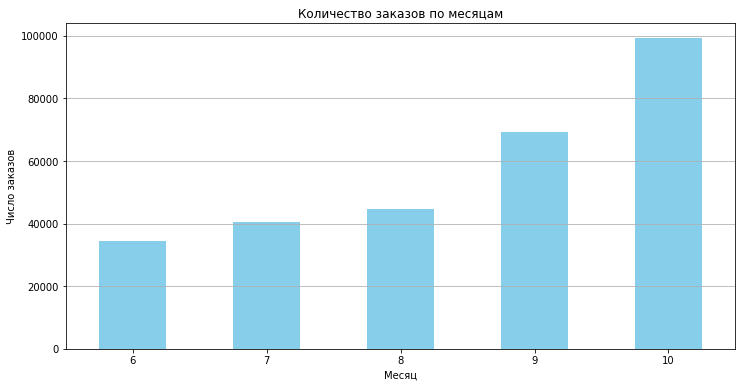

In [44]:
# Строим столбчатую диаграмму количества заказов по месяцам
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число заказов')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- В летние месяцы (июнь-август) фиксируется небольшое увеличение количества заказов, с наступлением осени и окончанием летних отпусков наблюдается тренд на значительное рост метрики, связанный с увеличением пользовательской активности. 

#### Распределение заказов билетов по сезонам

Для осеннего и летнего периодов сравните распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли.

In [45]:
# Создаем отдельные таблицы для лета и осени
summer = df_clean[df_clean['season'] == 'лето']
autumn = df_clean[df_clean['season'] == 'осень']

In [46]:
# Считаем доли для каждого сезона по типу мероприятий
event_summer = summer['event_type_main'].value_counts(normalize=True).mul(100).round(1)
event_autumn = autumn['event_type_main'].value_counts(normalize=True).mul(100).round(1)

# Объединяем в одну таблицу
events_comparison = pd.DataFrame({'Лето': event_summer, 'Осень': event_autumn})
display(events_comparison)

,Лето,Осень
unknown,0.2,0.0
выставки,2.0,1.4
другое,27.1,19.7
концерты,42.6,37.2
спорт,2.5,11.2
стендап,5.3,4.1
театр,20.1,25.3
ёлки,0.2,1.0


<Figure size 864x432 with 0 Axes>

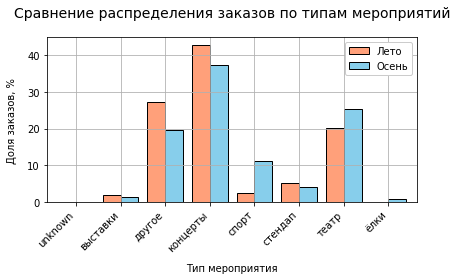

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = events_comparison.plot(kind='bar', width=0.8, color=['#FFA07A', '#87CEEB'], edgecolor='black')

plt.title('Сравнение распределения заказов по типам мероприятий', pad=20, fontsize=14)
plt.xlabel('Тип мероприятия', labelpad=10)
plt.ylabel('Доля заказов, %', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid()

plt.legend(framealpha=1)
plt.tight_layout()
plt.show()

- Летом доминируют концерты (42.6%) + другое (27.1%)
- Осенью структура более сбалансирована: концерты (37.2%) + театр (25.3%) + спорт (11.2%)

In [48]:
# Считаем доли для каждого сезона по типу устройства
device_summer = summer['device_type_canonical'].value_counts(normalize=True).mul(100).round(1)
device_autumn = autumn['device_type_canonical'].value_counts(normalize=True).mul(100).round(1)

types_comparison = pd.DataFrame({'Лето': device_summer, 'Осень': device_autumn})
display(types_comparison)

,Лето,Осень
mobile,80.6,79.7
desktop,19.4,20.3


<Figure size 864x432 with 0 Axes>

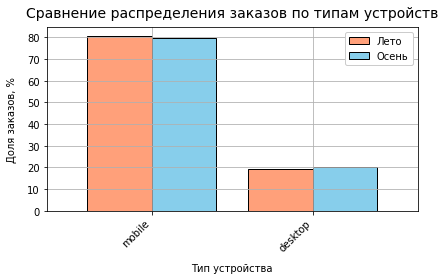

In [49]:
plt.figure(figsize=(12, 6))
ax = types_comparison.plot(kind='bar', width=0.8, color=['#FFA07A', '#87CEEB'], edgecolor='black')

plt.title('Сравнение распределения заказов по типам устройств', pad=10, fontsize=14)
plt.xlabel('Тип устройства', labelpad=10)
plt.ylabel('Доля заказов, %', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid()

plt.legend(framealpha=1)
plt.tight_layout()
plt.show()

- Сезон не влияет на выбор устройства — мобильные доминируют круглый год.

In [50]:
# Считаем доли для каждого сезона по возрасту
age_summer = summer['age_limit'].value_counts(normalize=True).mul(100).round(1)
age_autumn = autumn['age_limit'].value_counts(normalize=True).mul(100).round(1)

ages_comparison = pd.DataFrame({'Лето': age_summer, 'Осень': age_autumn})
display(ages_comparison)

,Лето,Осень
0,17.9,23.6
6,18.2,17.6
12,20.6,22.1
16,28.3,26.2
18,15.0,10.4


<Figure size 864x432 with 0 Axes>

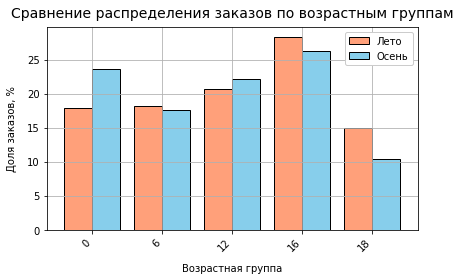

In [51]:
plt.figure(figsize=(12, 6))
ax = ages_comparison.plot(kind='bar', width=0.8, color=['#FFA07A', '#87CEEB'], edgecolor='black')

plt.title('Сравнение распределения заказов по возрастным группам', pad=10, fontsize=14)
plt.xlabel('Возрастная группа', labelpad=10)
plt.ylabel('Доля заказов, %', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid()

plt.legend(framealpha=1)
plt.tight_layout()
plt.show()

- Семейный сегмент (0+ и 6+) увеличивает долю осенью (в сумме с 36.1% до 41.2%)
- Молодежная аудитория (16+ и 18+) сокращается с 43.3% до 36.6%
- Подростки (12+) остаются стабильной группой (~20-22%)

#### Изменение выручки с продажи одного билета в зависимости от типа мероприятия и сезона. 

Изучите изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? Для каждого типа мероприятия рассчитайте среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией.

In [52]:
# Расчитаем среднюю выручку по категориям и сезонам
mean_revenue = df_clean.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].mean().unstack()
display(mean_revenue)

season,лето,осень
event_type_main,,
unknown,3.611663,15.055038
выставки,86.416197,90.603609
другое,106.131213,103.283277
концерты,1082.258047,334.635597
спорт,79.013392,74.346054
стендап,221.875294,231.124973
театр,214.457364,175.969508
ёлки,271.436177,229.585590


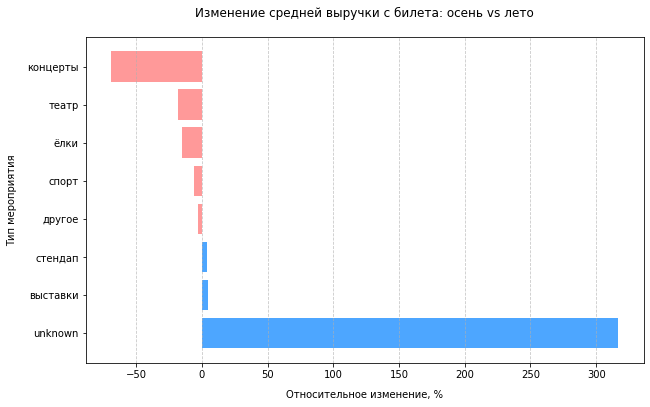

In [53]:
# Расчитаем относительное изменение
revenue_change = (mean_revenue['осень'] / mean_revenue['лето'] - 1) * 100
revenue_change = revenue_change.sort_values(ascending=False).to_frame('Изменение, %')

# Строим визуализацию
plt.figure(figsize=(10, 6))
bars = plt.barh(revenue_change.index, revenue_change['Изменение, %'], 
                color=np.where(revenue_change['Изменение, %'] > 0, '#4da6ff', '#ff9999'))

plt.title('Изменение средней выручки с билета: осень vs лето', pad=20)
plt.xlabel('Относительное изменение, %', labelpad=10)
plt.ylabel('Тип мероприятия', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

- Kонцерты демонстрируют резкое падение выручки: Лето: 1 083 руб., Осень: 335 руб. (-67.5%)
Возможные причины: летние открытые концерты (фестивали) дороже осенних indoor-событий.
- Театр и ёлки также дешевеют осенью: Театр: 215 руб. → 176 руб. (-18%). Ёлки: 271 руб. → 230 руб. (-15%)
Причина: осенью преобладают локальные постановки, а не премьеры.

### Анализ осенней активности пользователей

Проанализируйте динамику изменений по дням для:
- общего числа заказов;
- количества активных пользователей DAU;
- среднего числа заказов на одного пользователя;
- средней стоимости одного билета.

In [54]:
# Отберем осенние месяцы
df_fall = df_clean[df_clean['season'] == 'осень'].copy()

In [55]:
df_fall['date'] = pd.to_datetime(df_fall['created_dt_msk'])          

In [56]:
daily_stats = df_fall.groupby('date').agg(
              total_orders=('order_id', 'count'), # общее число заказов
              unique_users=('user_id', 'nunique')).reset_index() # общее количество пользователей
display(daily_stats)

,date,total_orders,unique_users
0,2024-09-01,1327,564
1,2024-09-02,1380,574
2,2024-09-03,5111,778
3,2024-09-04,1773,685
4,2024-09-05,1944,739
...,...,...,...
56,2024-10-27,2849,1034
57,2024-10-28,2838,985
58,2024-10-29,2836,998
59,2024-10-30,2928,1040


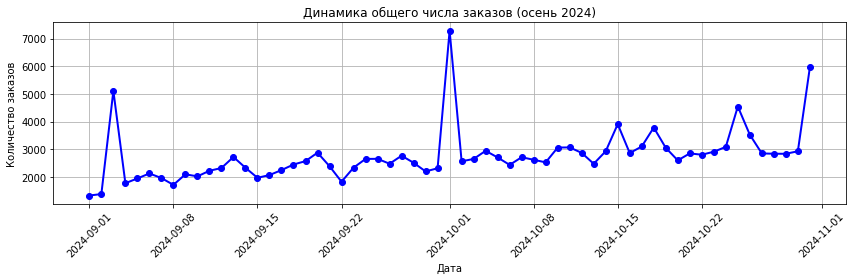

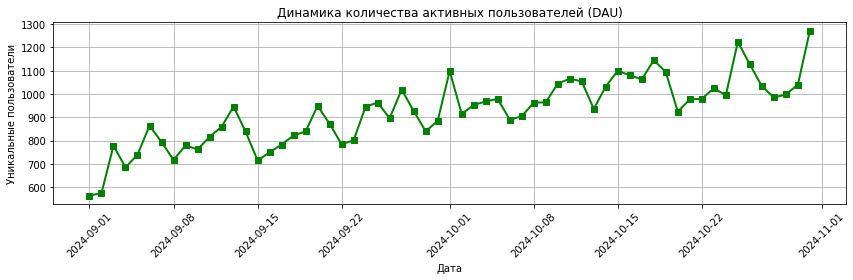

In [57]:
# Строим линейный график динамики общего числа заказов по дням
plt.figure(figsize=(12, 4))
plt.plot(daily_stats['date'], daily_stats['total_orders'], color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Динамика общего числа заказов (осень 2024)')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Строим линейный график динамики количества активных пользователей по дням
plt.figure(figsize=(12, 4))
plt.plot(daily_stats['date'], daily_stats['unique_users'], color='green', marker='s', linestyle='-', linewidth=2)
plt.title('Динамика количества активных пользователей (DAU)')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Заказы:
- Среднедневной уровень заказо: 2500–3000.
- Пики: 3 сентября (5111 заказов) - вероятно, массовые покупки (корпоративные заказы или крупное мероприятие), 30 сентября (7307 - максимум, в 2–3 раза выше среднего) - возможно, начало акций, 31 октября (5961) - (хэллоуинский всплеск), 25 октября – 4579 заказов (локальный пик). 
- Спады: 4 сентября – 1773 заказов (резкий спад после аномалии 3 сентября), 22 сентября – 1841 заказ (возможно, слабая активность в выходные).

Пользователи:
- Среднедневной уровень пользователей: ~900–1000.
- Пики: 31 октября – 1272 DAU (максимум, хэллоуинские активности), 25 октября – 1224 DAU (второй пик, возможно, концерты или фестивали), 30 сентября – 1103 DAU (аномально высокий показатель для сентября).
- Спады: 1–2 сентября – ~570 DAU (низкая активность в начале месяца, праздник 1 сентября), 22 сентября – 787 DAU (спад в выходные).

Общий тренд на рост метрик.

In [58]:
# Рассчитываем заказы на пользователя
daily_stats['orders_per_user'] = daily_stats['total_orders'] / daily_stats['unique_users']
display(daily_stats['orders_per_user'])

0     2.352837
1     2.404181
2     6.569409
3     2.588321
4     2.630582
        ...   
56    2.755319
57    2.881218
58    2.841683
59    2.815385
60    4.686321
Name: orders_per_user, Length: 61, dtype: float64

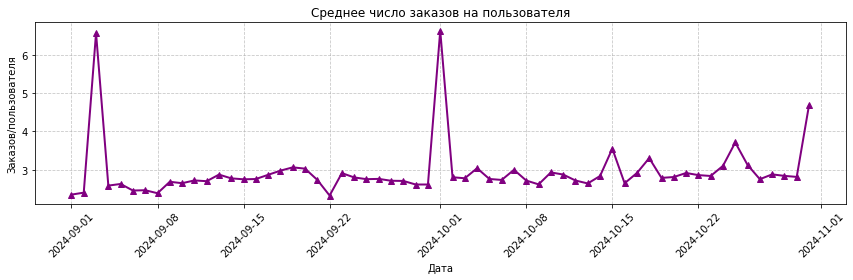

In [59]:
# Строим линейный график динамики среднего количества заказов на пользователя по дням
plt.figure(figsize=(12, 4))
plt.plot(daily_stats['date'], daily_stats['orders_per_user'], color='purple', marker='^', linestyle='-', linewidth=2)
plt.title('Среднее число заказов на пользователя')
plt.xlabel('Дата')
plt.ylabel('Заказов/пользователя')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Типичные значения колеблются между 2.3 и 3.1, что указывает на стандартное поведение пользователей (1 пользователь делает 2-3 заказа).

Пики:

- Аномально высокие значения: 3 сентября (6.57) и 30 сентября (6.62) - экстремальные всплески, возможно, это групповые покупки, корпоративные заказы или технические сбои. Особенно показательно для 30 сентября - рекордное значение при 884 пользователях.
- 31 октября (4.69) - повышенный спрос, связанный с хэллоуинскими мероприятиями.
- 25 октября (3.74), 19 октября (3.04), 12 октября (3.55) - периоды повышенной активности, возможно связанные с популярными событиями.

Спады:

- 22 сентября (2.34) - самый низкий показатель, возможно слабая активность в выходной день.

In [60]:
# Группируем по дате и считаем сумму выручки за день
daily_revenue = df_fall.groupby('date')['revenue_rub'].sum().reset_index()
# Расчитаем среднюю стоимость билета в день
daily_stats['avg_ticket_price'] = daily_revenue['revenue_rub'] / daily_stats['total_orders']
daily_stats['avg_ticket_price']

0     582.122801
1     848.558330
2     322.135942
3     821.506518
4     895.413549
         ...    
56    543.412712
57    507.198419
58    527.272141
59    623.915399
60    433.111600
Name: avg_ticket_price, Length: 61, dtype: float64

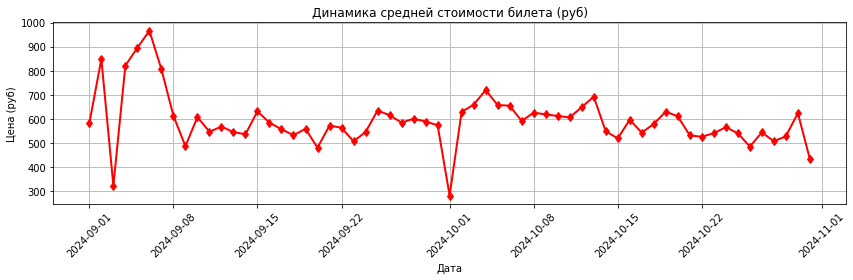

In [61]:
# Строим линейный график динамики средней стоимости билета по дням
plt.figure(figsize=(12, 4))
plt.plot(daily_stats['date'], daily_stats['avg_ticket_price'], color='red', marker='d', linestyle='-', linewidth=2)
plt.title('Динамика средней стоимости билета (руб)')
plt.xlabel('Дата')
plt.ylabel('Цена (руб)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Типичный разброс: 450–650 руб.
- Выше среднего: 500–600 руб. (большинство дней)
- Ниже среднего: <500 руб. (аномально дешевые дни)
    
Самые низкие цены:
- 30 сентября (277 руб.) – рекордно низкая стоимость (возможно, массовые скидки или техническая ошибка).
- 3 сентября (322 руб.) – второй минимум (совпадает с пиком заказов – 5111).
- 31 октября (433 руб.) – несмотря на хэллоуин, цена ниже среднего.

Самые высокие цены:
- 1 сентября (582 руб.) – максимальная стоимость.
- 5 сентября (895 руб.) – резкий рост после дешевого 3 сентября.
- 19 октября (616 руб.) – локальный пик (совпадает с пиком среднего количества закзов на пользователя (3.04))

#### Анализ недельной цикличности 

Изучите недельную цикличность. Выделите день недели и сравните пользовательскую активность в будни и выходные.

In [62]:
# Добавляем день недели (1=Пн, 7=Вс)
df_fall['day_of_week'] = df_fall['date'].dt.dayofweek  # 1-7
df_fall['day_name'] = df_fall['date'].dt.day_name()  
# Метка выходных
df_fall['is_weekend'] = df_fall['day_of_week'].isin([5, 6])  # 5=Сб, 6=Вс

In [63]:
# Группировка и агрегация
weekday_stats = df_fall.groupby(['day_name', 'is_weekend']).agg(
                total_orders=('order_id', 'count'),
                unique_users=('user_id', 'nunique'),
                total_revenue=('revenue_rub', 'sum')).reset_index()

# Расчёт производных метрик
weekday_stats['avg_orders_per_user'] = weekday_stats['total_orders'] / weekday_stats['unique_users']
weekday_stats['avg_revenue_per_user'] = weekday_stats['total_revenue'] / weekday_stats['unique_users']

# Сортировка по дням недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['day_name'] = pd.Categorical(weekday_stats['day_name'], categories=weekday_order, ordered=True)
weekday_stats = weekday_stats.sort_values('day_name')
weekday_stats

,day_name,is_weekend,total_orders,unique_users,total_revenue,avg_orders_per_user,avg_revenue_per_user
1,Monday,False,21517,4448,1.206586e+07,4.837455,2712.649415
5,Tuesday,False,31480,4793,1.425392e+07,6.567912,2973.904484
6,Wednesday,False,22888,4813,1.393669e+07,4.755454,2895.634075
4,Thursday,False,27169,4970,1.564533e+07,5.466600,3147.953312
0,Friday,False,24828,4870,1.515424e+07,5.098152,3111.753065
2,Saturday,True,21336,4571,1.297115e+07,4.667688,2837.704709
3,Sunday,True,19389,4394,1.182930e+07,4.412608,2692.147694


Рабочие дни (Пн–Пт):
- Выше средние показатели по заказам, выручке и пользователям.

- Пиковые дни:
- - Вторник – максимальные заказы (31,480).
- - Четверг – наибольшее число уникальных пользователей (4,970) и выручка (15.6 млн руб).
Возможно, связаны с анонсами мероприятий, корпоративными заказами или акциями.

Выходные (Сб–Вс):
- Снижение активности на 10–15% по сравнению с рабочими днями.
- Воскресенье – минимум по всем метрикам (19,389 заказов, 4,394 пользователей).
Возможно, меньше деловых/групповых покупок, пользователи чаще отдыхают.

### Анализ популярных событий и партнёров
#### Анализ мероприятий по регионам

Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?

In [64]:
# Группируем по регионам
region_stats = df_clean.groupby('region_name').agg(
               unique_events=('event_id', 'nunique'),  # Уникальные мероприятия
               total_orders=('order_id', 'count'),     # Общее число заказов
               unique_users=('user_id', 'nunique')).reset_index() # Уникальные пользователи

# Сортируем по количеству уникальных мероприятий (по убыванию)
region_stats = region_stats.sort_values('unique_events', ascending=False)
region_stats

,region_name,unique_events,total_orders,unique_users
24,каменевский регион,5935,89665,10550
61,североярская область,3800,43738,6692
78,широковская область,1232,16169,3250
58,светополянский округ,1075,7502,1659
53,речиновская область,702,6267,1528
...,...,...,...,...
34,лесноярский край,2,19,10
69,теплоозёрский округ,2,7,5
67,сосноводолинская область,2,10,7
6,верхозёрский край,2,11,5


In [65]:
# ТОП-5 регионов по разнообразию событий
top_5 = region_stats.sort_values('unique_events', ascending=False).head(5)

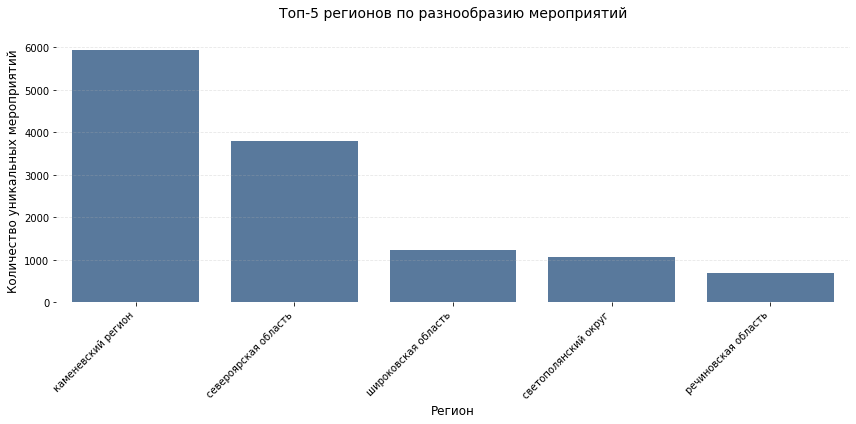

In [66]:
plt.figure(figsize=(12, 6))

# Создаем столбчатую диаграмму
ax = sns.barplot(data=top_5,
                x='region_name',
                y='unique_events',
                color='#4e79a7',  
                saturation=0.75)

plt.title('Топ-5 регионов по разнообразию мероприятий', pad=20, fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Количество уникальных мероприятий', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Убираем лишние границы
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [67]:
# Расчитаем для каждого региона долю мероприятий от их общего числа и долю заказов в регионе от общего числа заказов.
# Общее количество мероприятий и заказов
total_events = df_clean['event_id'].nunique()
total_orders = df_clean['order_id'].count()

# Группируем по регионам
region_stats = df_clean.groupby('region_name').agg(
               region_events=('event_id', 'nunique'),  # Уникальные мероприятия в регионе
               region_orders=('order_id', 'count')).reset_index()     # Заказы в регионе

# Расчитываем доли
region_stats['events_share'] = (region_stats['region_events'] / total_events * 100).round(2)
region_stats['orders_share'] = (region_stats['region_orders'] / total_orders * 100).round(2)

In [68]:
top_regions_events = region_stats.sort_values('events_share', ascending=False).head(5)
display(top_regions_events[['region_name', 'events_share', 'orders_share']])

,region_name,events_share,orders_share
24,каменевский регион,26.52,31.14
61,североярская область,16.98,15.19
78,широковская область,5.51,5.61
58,светополянский округ,4.80,2.61
53,речиновская область,3.14,2.18


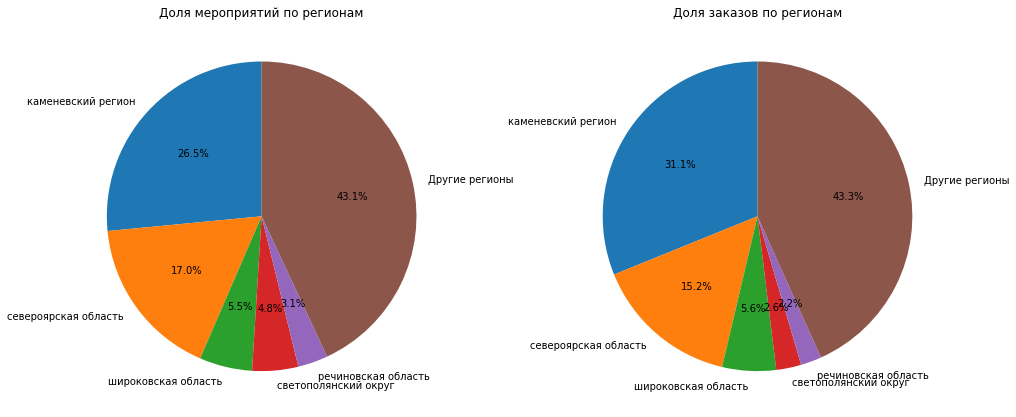

In [69]:
# Визуализируем относительные значения 
# Создаем строку "Другие регионы"
other_events = total_events - top_regions_events['region_events'].sum()
other_orders = total_orders - top_regions_events['region_orders'].sum()

top_with_other = top_regions_events.append({
                'region_name': 'Другие регионы',
                'events_share': (other_events / total_events * 100).round(2),
                'orders_share': (other_orders / total_orders * 100).round(2)}, ignore_index=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Доля мероприятий с другими регионами
ax1.pie(top_with_other['events_share'],
        labels=top_with_other['region_name'],
        autopct='%1.1f%%',
        startangle=90)
ax1.set_title('Доля мероприятий по регионам')

# Доля заказов с другими регионами
ax2.pie(top_with_other['orders_share'],
        labels=top_with_other['region_name'],
        autopct='%1.1f%%',
        startangle=90)
ax2.set_title('Доля заказов по регионам')

plt.tight_layout()
plt.show()

- Каменевский регион — безусловный лидер, генерирующий 31% заказов при 27% событий, что указывает на высокую эффективность и востребованность мероприятий. Североярская область показывает сбалансированные показатели, а вот Светополянский округ и Речиновская область отстают по заказам (в 2 раза ниже доли событий), что требует анализа цен, инфраструктуры или маркетинга. Широковская область демонстрирует стабильность.

#### Анализ партнеров

Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

In [70]:
# Группируем по партнёрам
partner_stats = df_clean.groupby('service_name').agg(
                unique_events=('event_id', 'nunique'),  # Уникальные мероприятия
                total_orders=('order_id', 'count'),     # Общее число заказов
                total_revenue=('revenue_rub', 'sum')).reset_index()    # Суммарная выручка

# Преобразуем выручку: округляем и убираем экспоненциальную запись
partner_stats['total_revenue'] = partner_stats['total_revenue'].round(2)

# Сортируем по выручке (по убыванию)
partner_stats = partner_stats.sort_values('total_revenue', ascending=False)

# Настраиваем отображение чисел
pd.set_option('display.float_format', '{:,.2f}'.format)

partner_stats

,service_name,unique_events,total_orders,total_revenue
24,мой билет,1302,34473,"130,907,212.59"
3,билеты без проблем,4255,63022,"37,725,993.65"
25,облачко,2335,26402,"18,588,613.84"
21,лови билет!,4869,40802,"16,670,596.79"
8,весь в билетах,855,16410,"16,494,669.24"
5,билеты в руки,3536,40302,"13,196,906.51"
19,край билетов,252,6109,"6,405,689.24"
26,прачечная,1026,10222,"4,746,810.51"
13,дом культуры,272,4412,"4,358,655.98"
35,яблоко,714,5004,"3,868,336.88"


In [71]:
# ТОП-5 партнеров по разнообразию событий
top_5_part = partner_stats.sort_values('unique_events', ascending=False).head(5)
display(top_5_part)

,service_name,unique_events,total_orders,total_revenue
21,лови билет!,4869,40802,"16,670,596.79"
3,билеты без проблем,4255,63022,"37,725,993.65"
5,билеты в руки,3536,40302,"13,196,906.51"
25,облачко,2335,26402,"18,588,613.84"
22,лучшие билеты,1763,17761,"2,721,490.97"


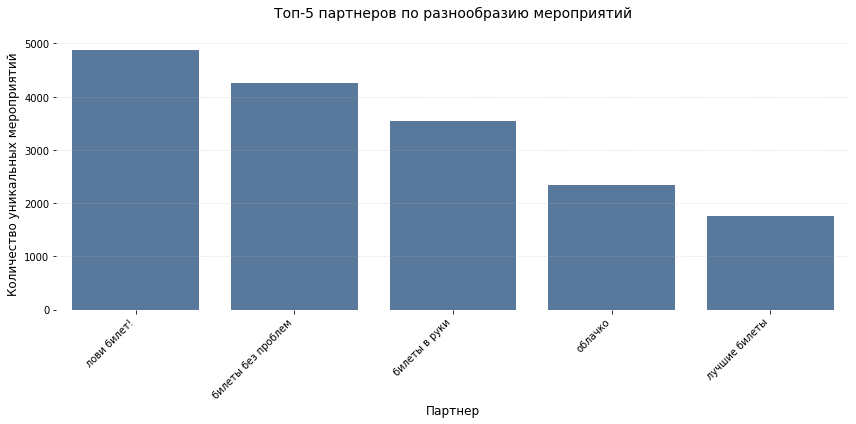

In [72]:
plt.figure(figsize=(12, 6))

# Создаем столбчатую диаграмму
ax = sns.barplot(data=top_5_part,
                x='service_name',
                y='unique_events',
                color='#4e79a7',  
                saturation=0.75)

plt.title('Топ-5 партнеров по разнообразию мероприятий', pad=20, fontsize=14)
plt.xlabel('Партнер', fontsize=12)
plt.ylabel('Количество уникальных мероприятий', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Убираем лишние границы
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

- "Билеты без проблем" - самый успешный по комплексным показателям (мероприятия, заказы, выручка)
- "Облачко" демонстрирует высокую эффективность - при меньшем количестве мероприятий генерирует большую выручку, чем "Лови билет!" (21,64 млн vs 17,67 млн)
- "Лучшие билеты" значительно уступают другим по выручке, несмотря на солидные показатели мероприятий и заказов
- "Лови билет!" лидирует по разнообразию мероприятий, но уступает по монетизации

In [73]:
# Расчитаем доли по каждой метрике
# ТОП-5 партнеров по разнообразию событий
top_5_part = partner_stats.sort_values('unique_events', ascending=False).head(5).copy()

# Рассчитываем общие суммы по всем партнерам
total_events = partner_stats['unique_events'].sum()
total_orders = partner_stats['total_orders'].sum()
total_revenue = partner_stats['total_revenue'].sum()

# Добавляем колонки с долями
top_5_part['Доля событий, %'] = (top_5_part['unique_events'] / total_events * 100).round(1)
top_5_part['Доля заказов, %'] = (top_5_part['total_orders'] / total_orders * 100).round(1)
top_5_part['Доля выручки, %'] = (top_5_part['total_revenue'] / total_revenue * 100).round(1)

# Форматируем вывод
pd.set_option('display.float_format', '{:,.1f}'.format)

# Переименовываем колонки для красоты
top_5_part = top_5_part.rename(columns={
    'unique_events': 'Уникальные события',
    'total_orders': 'Всего заказов',
    'total_revenue': 'Выручка, руб'})

display(top_5_part[['service_name', 'Уникальные события', 'Доля событий, %', 
                    'Всего заказов', 'Доля заказов, %', 
                    'Выручка, руб', 'Доля выручки, %']])

,service_name,Уникальные события,"Доля событий, %",Всего заказов,"Доля заказов, %","Выручка, руб","Доля выручки, %"
21,лови билет!,4869,20.0,40802,14.2,"16,670,596.8",6.1
3,билеты без проблем,4255,17.4,63022,21.9,"37,725,993.6",13.8
5,билеты в руки,3536,14.5,40302,14.0,"13,196,906.5",4.8
25,облачко,2335,9.6,26402,9.2,"18,588,613.8",6.8
22,лучшие билеты,1763,7.2,17761,6.2,"2,721,491.0",1.0


Лидеры по охвату:

- "Лови билет!" лидирует по числу уникальных событий (20%), но занимает лишь 3-е место по выручке (6.1%).

- "Билеты без проблем" — второй по событиям (17.4%), но главный по выручке (13.8%) и заказам (21.9%).

Эффективность монетизации:

- "Облачко" при относительно скромном охвате (9.6% событий) генерирует 6.8% выручки — лучшая конверсия в деньгах.

- "Лучшие билеты" (7.2% событий → 1% выручки) — наименее эффективны.

Разрыв в прибыльности:

- ТОП-2 партнера ("Билеты без проблем" и "Лови билет!") дают 19.9% выручки, но их доли в заказах (36.1%) почти вдвое выше.

- Остальные 3 партнера суммарно приносят 12.6% выручки при 29.4% заказов.

## Статистический анализ данных
### Проверка гипотезы №1

Проверьте гипотезы, которые предполагают большую активность пользователей мобильных устройств.

Гипотеза №1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. Используйте данные только за осенний период.

Формулировка гипотез:
- Нулевая гипотеза (H₀): Среднее количество заказов на одного пользователя мобильного приложения не выше среднего количества заказов на одного пользователя стационарных устройств.
μ_mobile = μ_desktop

- Альтернативная гипотеза (H₁): Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
μ_mobile > μ_desktop

In [74]:
# Группируем по пользователям и считаем заказы:
user_orders = df_fall.groupby(['user_id', 'device_type_canonical'])['order_id'].count().reset_index()
user_orders

,user_id,device_type_canonical,order_id
0,0005ca5e93f2cf4,mobile,1
1,000898990054619,mobile,2
2,000a55a418c128c,mobile,2
3,001e7037d013f0f,mobile,2
4,00245c702bc343e,mobile,2
...,...,...,...
19054,fff32fc9ad0f9f6,desktop,1
19055,fffcd3dde79eb2c,desktop,2
19056,fffcd3dde79eb2c,mobile,14
19057,fffeeb3c120cf0b,desktop,1


In [75]:
# Формируем группы
mobile_orders = user_orders[user_orders['device_type_canonical'] == 'mobile']['order_id']
desktop_orders = user_orders[user_orders['device_type_canonical'] == 'desktop']['order_id']

In [76]:
# Выведем описательную статистику для сравнения групп
display(pd.DataFrame({'mobile': mobile_orders,'desktop': desktop_orders}).describe())

,mobile,desktop
count,"14,190.0","4,869.0"
mean,9.5,7.0
std,68.1,36.0
min,1.0,1.0
25%,1.0,1.0
50%,2.0,2.0
75%,5.0,4.0
max,"4,336.0","1,502.0"


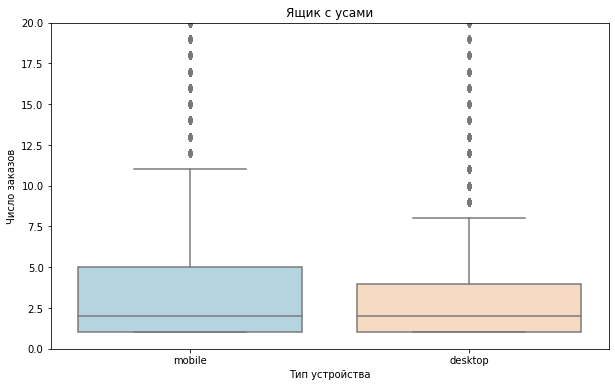

In [77]:
# Строим визализацию распределения (ящики с усами)
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_orders, x='device_type_canonical', y='order_id', 
            palette={'mobile': 'lightblue', 'desktop': 'peachpuff'})

plt.title('Ящик с усами')
plt.ylabel('Число заказов')
plt.xlabel('Тип устройства')
plt.ylim(0, 20)  # Ограничение для детализации
plt.show()

Проблема исходных данных:
- Крайне высокое стандартное отклонение (в 5-7 раз больше среднего)
- Наличие экстремальных выбросов (max=4,366 и 1,510 заказов)
- Сильно различающиеся размеры групп (14,197 и 4,884)


-  Для проверки гипотезы применяем U-тест Манна-Уитни из-за наличия экстремальных выбросов.

In [78]:
# Проводим U-тест Манна-Уитни
from scipy.stats import mannwhitneyu

alpha = 0.05
stat, p_value = mannwhitneyu(mobile_orders, 
                            desktop_orders,
                            alternative='greater')  # Правосторонняя проверка
print(f'p-значение: {p_value:.8f}') 
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее количество заказов мобильных пользователей значимо выше")
else:
    print("Не отвергаем нулевую гипотезу: нет доказательств, что среднее количество заказов мобильных пользователей значимо выше")

p-значение: 0.00000034
Отвергаем нулевую гипотезу: среднее количество заказов мобильных пользователей значимо выше


- Вывод: Различия между выборками статистически значимы (гипотеза о равенстве распределений отвергается).
- Это свидетельствует о том, что пользователи мобильных устройств ведут себя иначе, чем десктопные (например, дольше задерживаются, чаще совершают целевые действия и т.п.).

### Проверьте гипотезы №2 

Гипотеза №2: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Формулировка гипотез:

- Нулевая гипотеза (H₀): Среднее время между заказами пользователей мобильных приложений не выше среднего времени между заказами пользователей стационарных устройств. μ_mobile = μ_desktop

- Альтернативная гипотеза (H₁): Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств. μ_mobile > μ_desktop

In [79]:
# Удаляем строки, где days_since_prev = "нет" (преобразуем их в NaN)
df_fall['days_since_prev'] = pd.to_numeric(df_fall['days_since_prev'], errors='coerce')

# Удаляем оставшиеся пропуски (первые заказы пользователей)
df_fall = df_fall.dropna(subset=['days_since_prev'])

# Проверяем результат
print(f"Осталось записей: {len(df_fall)}")
print(f"Уникальных пользователей: {df_fall['user_id'].nunique()}")

Осталось записей: 160265
Уникальных пользователей: 11199


In [80]:
# Выводим описательную статистику по устройствам
print("Статистика времени между заказами:")
display(df_fall.groupby('device_type_canonical')['days_since_prev'].describe())

Статистика времени между заказами:


,count,mean,std,min,25%,50%,75%,max
device_type_canonical,,,,,,,,
desktop,"32,945.0",3.0,12.1,0.0,0.0,0.0,1.0,146.0
mobile,"127,320.0",3.8,13.4,0.0,0.0,0.0,1.0,148.0


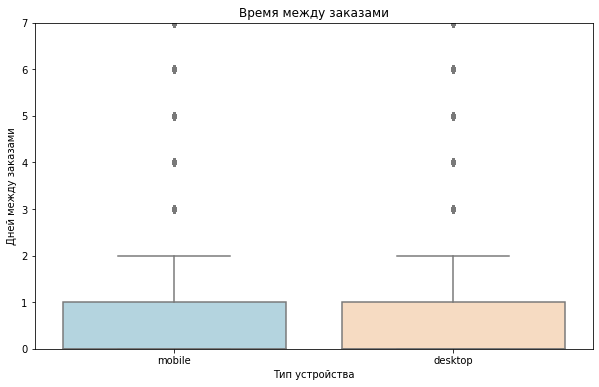

In [81]:
# Строим ящик с усами
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fall, x='device_type_canonical', y='days_since_prev',
           palette={'mobile': 'lightblue', 'desktop': 'peachpuff'})

plt.title("Время между заказами")
plt.ylabel('Дней между заказами')
plt.xlabel('Тип устройства')
plt.ylim(0, 7)  # Ограничиваем диапазон для наглядности
plt.show()

- Разница в средних (3 vs 3.8 дня) обусловлена более высокой долей активных пользователей среди мобильных и большим количеством повторных заказов.
- Однако стандартные отклонения очень велики (13.4 и 12.1 дней), что указывает на высокую вариативность данных.
- Медианные значения (0 дней): у более 50% пользователей в обеих группах время между заказами равно 0 дней. Это значает, что большинство заказов совершается: либо в тот же день (например, несколько заказов за один день) , либо данные содержат,например, дубли заказов или ошибки.
- Min значение: 0 заказов для обеих групп,  Max значение: 146 и 148, т.е. есть "суперпокупатели" с десятками заказов, искажающие среднее.


- Для проверки гипотезы применяем U-тест Манна-Уитни из-за наличия выбросов.

In [82]:
# Отбираем пользователей с более чем одним заказом, чтобы избежать искажения
# Сначала получим количество заказов для каждого пользователя
user_order_counts = df_fall['user_id'].value_counts()
users_with_multiple_orders = user_order_counts[user_order_counts > 1].index

# Фильтруем исходный DataFrame, оставляя только пользователей с несколькими заказами
df_filter = df_fall[df_fall['user_id'].isin(users_with_multiple_orders)]

In [83]:
# Формируем две группы для сравнения
mobile_users = df_filter[df_filter['device_type_canonical'] == 'mobile']
desktop_users = df_filter[df_filter['device_type_canonical'] == 'desktop']

In [84]:
# Проверим независимость групп
mobile_ids = set(mobile_users['user_id'])
desktop_ids = set(desktop_users['user_id'])

# Пользователи, которые есть в обеих группах (пересечение)
common_users = mobile_ids & desktop_ids
print(f"Количество пользователей в обеих группах: {len(common_users)}")

# Уникальные для mobile
only_mobile = mobile_ids - desktop_ids
print(f"Только mobile: {len(only_mobile)}")

# Уникальные для desktop
only_desktop = desktop_ids - mobile_ids
print(f"Только desktop: {len(only_desktop)}")

Количество пользователей в обеих группах: 3028
Только mobile: 4322
Только desktop: 419


In [85]:
# Находим пользователей, которые есть в обеих группах
hybrid_users = set(mobile_users['user_id']) & set(desktop_users['user_id'])

# Удаляем их из анализа
df_filter_clean = df_filter[~df_filter['user_id'].isin(hybrid_users)]

In [86]:
# Сформируем новые группы 
mobile_clean_users = df_filter_clean[df_filter_clean['device_type_canonical'] == 'mobile']
desktop_clean_users = df_filter_clean[df_filter_clean['device_type_canonical'] == 'desktop']

In [87]:
import scipy.stats as stats

alpha = 0.05
u_stat, p_value = stats.mannwhitneyu(mobile_clean_users['days_since_prev'],
                                     desktop_clean_users['days_since_prev'],
                                     alternative='greater')

print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее время между заказами мобильных пользователей значимо выше")
else:
    print("Не отвергаем нулевую гипотезу: нет доказательств, что среднее время между заказами мобильных пользователей выше")

p-value: 0.0000
Отвергаем нулевую гипотезу: среднее время между заказами мобильных пользователей значимо выше


- Вывод: Различия между выборками статистически значимы (гипотеза о равенстве распределений отвергается).
- Это свидетельствует о том, что среднее время между заказами у мобильных пользователей действительно выше, чем у пользователей стационарных устройств.

## Итоговый вывод:

- В Pandas были загружены данные трех датасетов `final_tickets_orders_df.csv`, `final_tickets_events_df.csv`, `final_tickets_tenge_df.csv`, которые после обЪединения содержали 24 столбца и 290849 строк, в которых представлена информация о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года, включает данные о заказах билетов, событиях, городах и регионах событий, площадках мероприятий, о курсе тенге к российскому рублю за 2024 год.


- При первичном знакомстве с данными и их предобработке выявили, что в одиннадцати столбцах есть пропущенные значения, которые образовались в результате обЪединения датафреймов. В десяти из которых (содержащих информацию о событиях) пропуски были заменены на заглушки `unknown` и `-1`. В столбце `days_since_prev` ~ 8%, образованы по причине отсутствия покупок у пользователей - оставлены без изменений, чтобы избежать искажения данных. Выполнено понижение размерности в 3 столбцах. В четырех столбцах данные приведены к нижнему регистру. По столбцу `revenue` с выручкой отфильтрованы данные до 99-го перцентиля, исключив выбросы и сохранив репрезентативность. Явных дубликатов нет, неявные - 28 (удалены). Созданы новые столбцы: `revenue_rub` — выручка с заказа к единой валюте (российский рубль),`one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие, `month` — месяц оформления заказа, `season — сезон`. Удалено 1% данных (выбросы). Итоговый объем - 287961 строк.


- Анализ данных показал, что по популярности мероприятий по обоим сезонам лидируют — концерты, другое и театры. Осенью  наблюдается спад концертов, рост спроса на стендап и ёлки, выставки и фестивали стабильны, театр и спорт теряют аудиторию. Осенью заказов в 2+ раза больше, чем летом, пики в начале сентября и октября (учебный сезон, праздники). Осенью средний чек снижается по всем типам мероприятий, кроме выставок и стендапа, котрые демонстрируют незначительный рост. Но в выходные и на премьеры — в целом выше. Активность пользователей осенью возрастает, в среднем 2–3 билета на человека, но в начале октября выше — групповые покупки (6+). Среди регионов и партнёров явные лидеры по числу заказов и выручке с продажи билетов: Каменевский регион, Североярская область, «Билеты без проблем» (максимум заказов), «Облачко» (высокая выручка).
- По результам проверки гипотез мобильные пользователи делают значительно больше заказов, чем десктопные. Мобильное приложение стимулирует частые покупки — возможно, за счёт удобства или push-уведомлений. По времени между заказами у мобильных пользователей дольше перерывы между заказами. Вероятно, мобильные заказы могут быть более спонтанными, а десктопные — запланированными (например, крупные покупки). Мобильные пользователи заказывают реже, но в большем объёме.

Рекомендации: 

Продвигать стендап и ёлки осенью. Изучить причины спада театра и спроса в выходные. Для десктопных пользователей — подписки/напоминания о повторных заказах. Для мобильных —  скидки на повторные заказы, акции на групповые покупки или премиум-услуги.
Осенью аудитория переключается на другие события, растут групповые покупки. Важно работать с партнёрами и регионами-лидерами.